In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.font_manager

# Run source tutorial
https://www.geeksforgeeks.org/machine-learning-for-anomaly-detection/

In [2]:
import matplotlib.font_manager
from pyod.models.knn import KNN 
from pyod.utils.data import generate_data, get_outliers_inliers

In [3]:
# [1] CREATE SYNTHETIC DATA
npoints = 300

# Generating a random dataset with two features
X_train, y_train = generate_data(n_train = npoints, train_only = True,
                                                   n_features = 2)

In [4]:
# Storing the outliers and inliners in different numpy arrays
X_outliers, X_inliers = get_outliers_inliers(X_train, y_train)
n_inliers = len(X_inliers)
n_outliers = len(X_outliers)
print("There are", n_inliers, "inliers and", n_outliers, "outliers")

There are 270 inliers and 30 outliers


In [5]:
# Separating the two features
f1 = X_train[:, [0]] # .reshape(-1, 1) # This destructures the array f1[:,0]
f2 = X_train[:, [1]] # .reshape(-1, 1)

Text(0, 0.5, 'Feature 2')

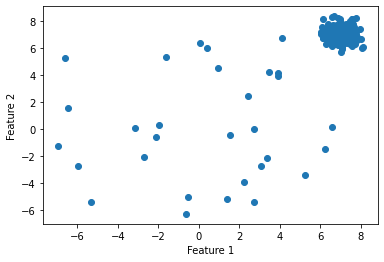

In [6]:
# [2] VISUALIZE THE DATA
# Visualising the dataset
# create a meshgrid
xx, yy = np.meshgrid(np.linspace(-10, 10, 200),
                     np.linspace(-10, 10, 200))
  
# scatter plot
plt.scatter(f1, f2)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

In [7]:
# [3] TRAIN THE MODEL AND EVALUATE

# Setting the percentage of outliers
outlier_fraction = 0.1

# Training the classifier
clf = KNN(contamination = outlier_fraction)
clf.fit(X_train, y_train)
  
# You can print this to see all the prediciton scores
scores_pred = clf.decision_function(X_train)*-1
  
y_pred = clf.predict(X_train)
n_errors = (y_pred != y_train).sum()

/opt/conda/lib/python3.7/site-packages/pyod/models/base.py:349: UserWarning: y should not be presented in unsupervised learning.
  "y should not be presented in unsupervised learning.")


In [8]:
# Counting the number of errors  
print('The number of prediction errors are', n_errors, ', equal to ', "{:.2f}".format(n_errors/npoints), '% out of', npoints, 'data points')

The number of prediction errors are 0 , equal to  0.00 % out of 300 data points


In [9]:
# [4] VISUALIZING THE PREDICTIONS

# threshold value to consider a
# datapoint inlier or outlier
threshold = stats.scoreatpercentile(scores_pred, 100 * outlier_fraction)

In [10]:
# decision function calculates the raw 
# anomaly score for every point
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
Z = Z.reshape(xx.shape)

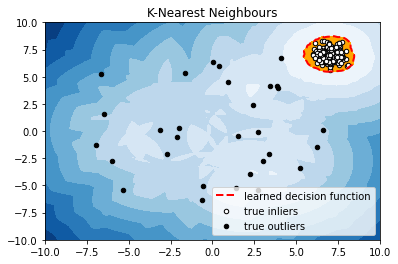

In [12]:
# fill blue colormap from minimum anomaly
# score to threshold value
subplot = plt.subplot(1, 1, 1)
subplot.contourf(xx, yy, Z, levels = np.linspace(Z.min(), 
                  threshold, 10), cmap = plt.cm.Blues_r)

# draw red contour line where anomaly 
# score is equal to threshold
a = subplot.contour(xx, yy, Z, levels =[threshold],
                     linewidths = 2, colors ='red')

# fill orange contour lines where range of anomaly
# score is from threshold to maximum anomaly score
subplot.contourf(xx, yy, Z, levels =[threshold, Z.max()], colors ='orange')
  
# scatter plot of inliers with white dots
b = subplot.scatter(X_train[:-n_outliers, 0], X_train[:-n_outliers, 1],
                                    c ='white', s = 20, edgecolor ='k') 
  
# scatter plot of outliers with black dots
c = subplot.scatter(X_train[-n_outliers:, 0], X_train[-n_outliers:, 1], 
                                    c ='black', s = 20, edgecolor ='k')
subplot.axis('tight')

subplot.legend(
    [a.collections[0], b, c],
    ['learned decision function', 'true inliers', 'true outliers'],
    prop = matplotlib.font_manager.FontProperties(size = 10),
    loc ='lower right')
  
subplot.set_title('K-Nearest Neighbours')
#subplot.set_xlim((-3.5, 4.5))
#subplot.set_ylim((-3.5, 4.5))
subplot.set_xlim((-10, 10))
subplot.set_ylim((-10, 10))
plt.show() 